## Multiprompting

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import io
import os
import warnings

from IPython.display import display
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

<IPython.core.display.Javascript object>

In [3]:
STABILITY_API_KEY = os.environ.get("STABILITY_API_KEY")


<IPython.core.display.Javascript object>

In [4]:
stability_api = client.StabilityInference(
    key=STABILITY_API_KEY, verbose=False, engine="stable-diffusion-v1-5",
)

<IPython.core.display.Javascript object>

In [5]:
response = stability_api.generate(
    prompt="a mountain landscape in the style of thomas kinkade",
    seed=9080980,
    steps=30,
    cfg_scale=8.0,
    width=512,
    height=512,
    samples=1,
    sampler=generation.SAMPLER_K_DPMPP_2M,
)

<IPython.core.display.Javascript object>

image file name:  images/image_9080980.png


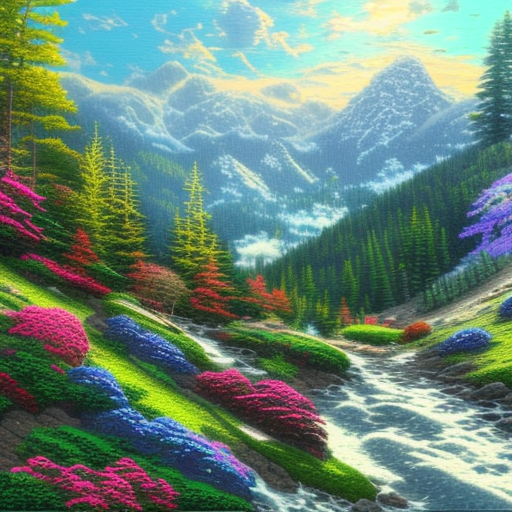

<IPython.core.display.Javascript object>

In [6]:
for resp in response:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn("Safety filters activated")
        if artifact.type == generation.ARTIFACT_IMAGE:
            file_name = "images/image_" + str(artifact.seed) + ".png"
            print("image file name: ", file_name)
            with open(file_name, "wb") as image_file:
                image_file.write(artifact.binary)
            img = Image.open(io.BytesIO(artifact.binary))
            display(img)

In [11]:
response2 = stability_api.generate(
    # prompt="a mountain landscape in the style of thomas kinkade",
    prompt=[
        generation.Prompt(
            text="a mountain landscape",
            parameters=generation.PromptParameters(weight=5),
        ),
        generation.Prompt(
            text="in the style of thomas kinkade",
            parameters=generation.PromptParameters(weight=1),
        ),
        generation.Prompt(
            text="greenery", parameters=generation.PromptParameters(weight=-2.0)
        ),
    ],
    seed=9080980,
    steps=30,
    cfg_scale=8.0,
    width=512,
    height=512,
    samples=1,
    sampler=generation.SAMPLER_K_DPMPP_2M,
)

<IPython.core.display.Javascript object>

image file name:  images/image_9080980.png


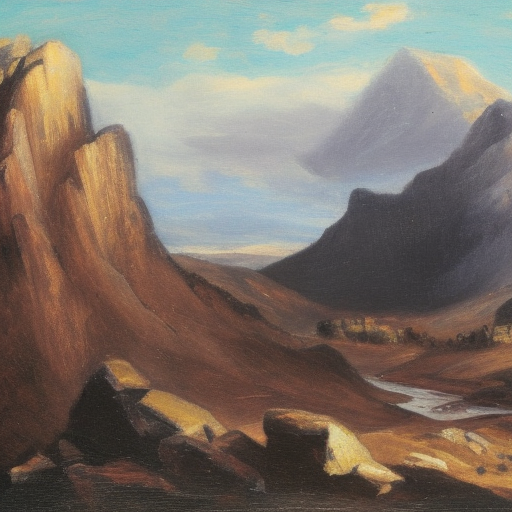

<IPython.core.display.Javascript object>

In [12]:
for resp in response2:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn("Safety filters activated")
        if artifact.type == generation.ARTIFACT_IMAGE:
            file_name = "images/image_" + str(artifact.seed) + ".png"
            print("image file name: ", file_name)
            with open(file_name, "wb") as image_file:
                image_file.write(artifact.binary)
            img2 = Image.open(io.BytesIO(artifact.binary))
            display(img2)